<a href="https://colab.research.google.com/github/BhoomiAgrawal12/AIPractice/blob/main/Bgg16(DogsAndCats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow

In [2]:
tensorflow.__version__

'2.18.0'

In [3]:
import keras

In [4]:
keras.__version__

'3.8.0'

In [5]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import os


In [6]:
IMAGE_SIZE=[224,224]
train_path="train"
test_path="test"

vgg16 have 13 cnn layers and 3 dense layers but this three work on 1000 labels,but currently working on only 2 dogs and cats that is why  we should not include this dense layers that is why  include_top is false

In [7]:
vgg16=VGG16(input_shape=IMAGE_SIZE+[3],weights="imagenet",include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [8]:
for layer in vgg16.layers:
    print(layer)

<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [9]:
%pwd

'/content'

In [10]:
%cd /content/drive/MyDrive/imageClassification

/content/drive/MyDrive/imageClassification


In [11]:
%pwd

'/content/drive/MyDrive/imageClassification'

In [12]:
%ls

test/  train/


In [13]:
#to freez the weight
for layer in vgg16.layers:
    layer.trainable=False

In [14]:
for layer in vgg16.layers:
    print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [15]:
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [16]:
folder=glob("train/*")

In [17]:
folder

['train/dogs', 'train/cats']

In [18]:
len(folder)

2

In [19]:
#adding custom dense layer
model =Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(len(folder),activation="softmax"))


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,986 (80.64 MB)

 Trainable params: 6,423,298 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [21]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [22]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen=ImageDataGenerator(rescale=1./255)

In [23]:
training_set=train_datagen.flow_from_directory("train",target_size=(224,224),batch_size=32,class_mode="categorical")

Found 557 images belonging to 2 classes.


In [24]:
testing_set=train_datagen.flow_from_directory("test",target_size=(224,224),batch_size=32,class_mode="categorical")

Found 140 images belonging to 2 classes.


In [25]:
history=model.fit(training_set,
          validation_data=testing_set,
          epochs=50,
          steps_per_epoch=len(training_set),
          validation_steps=len(testing_set)
          )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 327s 17s/step - accuracy: 0.5750 - loss: 2.6964 - val_accuracy: 0.7643 - val_loss: 0.4823
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 837ms/step - accuracy: 0.8701 - loss: 0.3325 - val_accuracy: 0.7357 - val_loss: 0.8213
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 788ms/step - accuracy: 0.8602 - loss: 0.2991 - val_accuracy: 0.7643 - val_loss: 0.5614
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 765ms/step - accuracy: 0.9303 - loss: 0.1526 - val_accuracy: 0.7714 - val_loss: 0.6076
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 770ms/step - accuracy: 0.9456 - loss: 0.1216 - val_accuracy: 0.8071 - val_loss: 0.5302
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 762ms/step - accuracy: 0.9690 - loss: 0.0897 - val_accuracy: 0.8000 - val_loss: 0.4709
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 762ms/step - accuracy: 0.9673 - loss: 0.0713 - val_accuracy: 0.8000 - val_loss: 0.5122
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 767ms/step - accuracy: 0.9899 - loss: 0.0532 - val_accur

In [26]:
history.history

{'accuracy': [0.614003598690033,
  0.865350067615509,
  0.888689398765564,
  0.9245960712432861,
  0.9515260457992554,
  0.9712746739387512,
  0.9676840305328369,
  0.9910233616828918,
  0.9892280101776123,
  0.9892280101776123,
  0.985637366771698,
  0.9946140050888062,
  0.9946140050888062,
  0.9982046484947205,
  0.9964093565940857,
  0.9982046484947205,
  0.9982046484947205,
  1.0,
  0.9982046484947205,
  0.9964093565940857,
  0.9982046484947205,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9982046484947205,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [1.8402972221374512,
  0.3742141127586365,
  0.25651347637176514,
  0.1777810901403427,
  0.11562424153089523,
  0.08323337137699127,
  0.0769146978855133,
  0.055580586194992065,
  0.05342184752225876,
  0.05013277381658554,
  0.0455370768904686,
  0.026513542979955673,
  0.02433708868920803,
  0.01831892319023609,

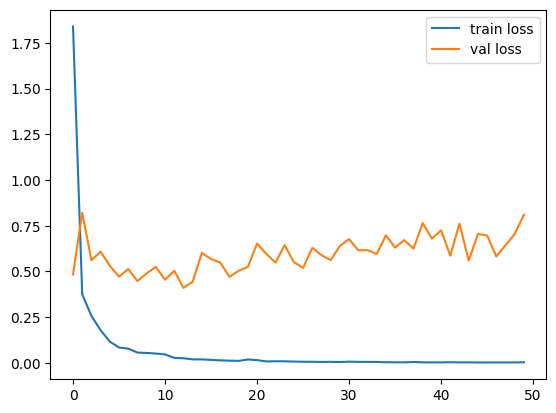

<Figure size 640x480 with 0 Axes>

In [27]:
plt.plot(history.history["loss"],label="train loss")
plt.plot(history.history["val_loss"],label="val loss")
plt.legend()
plt.show()
plt.savefig("Loss graph")

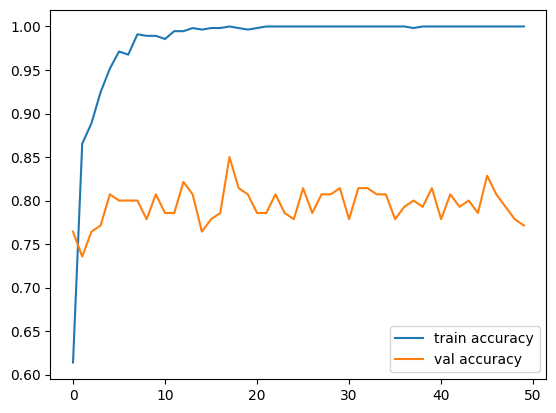

<Figure size 640x480 with 0 Axes>

In [28]:
plt.plot(history.history["accuracy"],label="train accuracy")
plt.plot(history.history["val_accuracy"],label="val accuracy")
plt.legend()
plt.show()
plt.savefig("Accuracy graph")

In [29]:
model.save("model_vgg16.h5")

In [30]:
from tensorflow.keras.models import load_model
model=load_model("model_vgg16.h5")

In [31]:
y_pred=model.predict(testing_set)

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 489ms/step


In [32]:
y_pred



array([[9.99789774e-01, 2.10190090e-04],
       [1.13674469e-04, 9.99886274e-01],
       [1.00000000e+00, 3.73026197e-08],
       [9.96042728e-01, 3.95722780e-03],
       [9.99996424e-01, 3.55483826e-06],
       [6.77936478e-04, 9.99322057e-01],
       [9.99989033e-01, 1.09270813e-05],
       [9.99091387e-01, 9.08657268e-04],
       [9.98788774e-01, 1.21127605e-03],
       [6.23246375e-03, 9.93767500e-01],
       [2.25821580e-03, 9.97741818e-01],
       [3.23432141e-05, 9.99967694e-01],
       [9.97807920e-01, 2.19214172e-03],
       [1.84295550e-01, 8.15704405e-01],
       [9.99925137e-01, 7.49062092e-05],
       [1.61237955e-01, 8.38761985e-01],
       [5.98360479e-01, 4.01639491e-01],
       [4.31199610e-01, 5.68800390e-01],
       [3.59068144e-05, 9.99964118e-01],
       [2.65291273e-08, 1.00000000e+00],
       [9.99879837e-01, 1.20106459e-04],
       [1.38617493e-03, 9.98613834e-01],
       [1.32248504e-02, 9.86775160e-01],
       [9.99948502e-01, 5.14906060e-05],
       [1.938958

In [33]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0])

In [34]:
image_name="244.jpg"

In [35]:
img=image.load_img(image_name,target_size=(224,224))

In [36]:
x=image.img_to_array(img)
x

array([[[ 91.,  80.,  50.],
        [ 91.,  80.,  50.],
        [ 91.,  80.,  50.],
        ...,
        [ 52.,  45.,  29.],
        [ 51.,  44.,  28.],
        [ 51.,  44.,  28.]],

       [[ 92.,  81.,  51.],
        [ 92.,  81.,  51.],
        [ 92.,  81.,  51.],
        ...,
        [ 45.,  38.,  22.],
        [ 44.,  37.,  21.],
        [ 44.,  37.,  21.]],

       [[ 93.,  82.,  52.],
        [ 93.,  82.,  52.],
        [ 93.,  82.,  52.],
        ...,
        [ 37.,  30.,  14.],
        [ 36.,  29.,  13.],
        [ 36.,  29.,  13.]],

       ...,

       [[162., 139., 108.],
        [163., 140., 109.],
        [163., 140., 109.],
        ...,
        [188., 183., 177.],
        [185., 180., 174.],
        [183., 178., 172.]],

       [[166., 142., 114.],
        [166., 143., 112.],
        [167., 143., 115.],
        ...,
        [188., 183., 177.],
        [185., 181., 172.],
        [183., 178., 172.]],

       [[167., 143., 117.],
        [162., 138., 110.],
        [166., 1

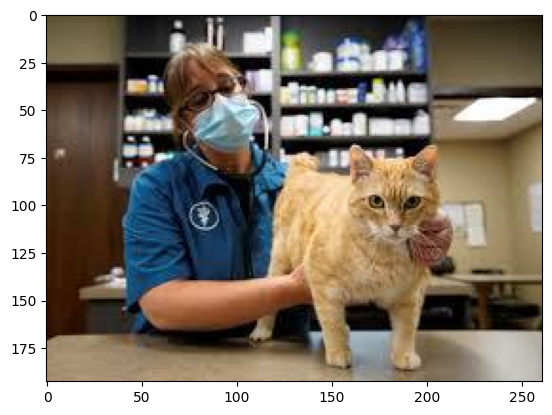

In [37]:
z=plt.imread(image_name)
plt.imshow(z)

In [38]:
x.shape

(224, 224, 3)

In [39]:
x=x/255

In [40]:
from keras.applications.vgg16 import preprocess_input

In [41]:
#adding the batch dimension
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [42]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[9.9999774e-01, 2.2564388e-06]], dtype=float32)

In [43]:
result=np.argmax(model.predict(img_data),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [44]:
result

array([0])

In [46]:
if result[0]==1:
  print("dog")
else:
  print("cat")

cat
